In [1]:
#standartiniai moduliai
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
from dateutil import parser
#import mysql.connector as cnt
#import panel as pn
#pn.extension()
import seaborn as sns
import os, sys
print(os.getcwd())
fontsize=16 #for all entries
titlesize=24
labelsize=16
fwidth=6
fheight=4

c:\Users\Cougar\Desktop\Python Github\JupyterNoteboooks


In [2]:
d = {'A':7,'B':9, 'C':12}
d1 = {'A':5,'B':11,'C':15}
data = [d,d1]

df = pd.DataFrame(data=data)
df

,A,B,C
0,7,9,12
1,5,11,15


In [3]:
d = {'AB':np.random.rand(10), 'BC':np.random.randint(10,100,10)}

df = pd.DataFrame(data=d)
df

,AB,BC
0,0.326447,98
1,0.551180,83
2,0.283136,78
3,0.247588,81
4,0.557120,48
5,0.777738,30
6,0.802419,51
7,0.032262,10
8,0.123065,49
9,0.778550,48


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import time
import selenium
import undetected_chromedriver as uc
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup

opcijos = Options()
#opcijos.add_argument('--incognito')
# opcijos.add_argument('--headless')

# driver = uc.Chrome(options=opcijos)
driver = webdriver.Chrome(options=opcijos)

In [ ]:
#ARUODO PVZ SU KOMENTARAIS
for skelbimas in ResultsSet:
    try:
        addres_element  = skelbimas.find('div', {'class':'list-adress-v2'})
        tag = addres_element.find('h3').find('a', href=True)
        linkas = tag['href']
        # tekstą galima pasiekti ir per 
        # .contents atributą
        tekstas = tag.contents #jums gražina list objektą su teksto gabalais
        f = ''
        for i in tekstas:
            f = f + str(i).strip() # str - kad garantuotai būtų tekstas
        adresas = f.replace('<br/>', ', ')
        
        # tuo tarpu .text gražina contents tekstą kaip vientisą
        # tekstas = tag.text.strip() # string metodas, skirtas pašalinti tarpus iš pradžios bei pabaigos
        print("====SKELBIMAS====")
        print(linkas, adresas)
    except:
        pass

In [ ]:
# NUSTATYMAI SU FIREFOX
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import time
import selenium
# import undetected_chromedriver as uc
from selenium import webdriver
# from selenium.webdriver.chrome.options import Options
from selenium.webdriver.firefox.options import Options
from bs4 import BeautifulSoup
opcijos = Options()
opcijos.add_argument('--incognito')
# opcijos.add_argument('--headless')
# driver = uc.Chrome(options=opcijos)
driver = webdriver.Firefox(options=opcijos)

In [ ]:
puslapio_nr = []
buto_kaina = []
kvadrato_kaina = []
buto_adresas = []
buto_plotas = []
buto_kambariu_sk = []
data = []
for puslapis in range(2,12):
    url = f'https://www.aruodas.lt/butai/puslapis/{puslapis}'
    opcijos = Options()
    driver = webdriver.Chrome(options=opcijos)
    driver.get(url)
    time.sleep(20)
    source = driver.page_source
    
    bs = BeautifulSoup(source, 'html.parser')
    ResultSet = bs.find_all('div', {'class':'advert-flex'})
    print(len(ResultSet))

    for skelbimas in ResultSet:
        try:
            price_element= skelbimas.find('div', {'class':'price'})
            tag = price_element.find('span')
            kaina = tag.contents[0]
            kvm_kaina_element= skelbimas.find('div', {'class':'price'})
            tag1 = kvm_kaina_element.find('span', {'class':'price-pm-v2'})
            kvm_kaina =tag1.contents[0]
            address_element = skelbimas.find('div', {'class':'list-adress-v2'})
            tag2 = address_element.find('h3').find('a', href=True)
            linkas = tag2['href']
            tekstas = tag2.contents
            plotas_element= skelbimas.find('div', {'class':'list-AreaOverall-v2 list-detail-v2'})
            plotas =plotas_element.contents[0]
            kambasiu_sk_element= skelbimas.find('div', {'class':'list-RoomNum-v2 list-detail-v2'})
            kambariu_sk =kambasiu_sk_element.contents[0]

            f = ''
            for i in kaina:
                f = f + str(i).strip()
            kaina = f.replace('€', '')
            f1 = ''
            for a in kvm_kaina:
                f1 = f1 + str(a).strip()
            kvm_kaina = f1[:-4]
            f2 = ''
            for i in tekstas:
                f2 = f2 + str(i).strip()
            tekstas = f2.replace('<br/>', ', ')
            f3 = ''
            for a in plotas:
                f3 = f3 + str(a).strip()
            plotas = f3
            f4 = ''
            for i in kambariu_sk:
                f4 = f4 + str(i).strip()
            kambariu_sk = f4

            d = {'buto _kaina':kaina, 'kvadrato_kaina': kvm_kaina, 'adresas':tekstas, 'plotas':plotas, 'kambariu_skaicius':kambariu_sk}
            data.append(d)
            print(d)
        except Exception as klaida:
            print(klaida)
    # time.sleep(np.random.randint(10,100))
    time.sleep(5)
driver.close() 
df = pd.DataFrame(data=data)
df.to_csv('Aruodas 2024_04_22.csv', header=True, index=False, sep=';')

In [14]:
# suraskite, kiek iš atrinktų butų buvo pagal kainą pigūs, brangūs, neįperkami. Kriterijus - 1 kv metro kaina iki 1 VDu - pigūs, iki 3 VDU - brangūs, daugiau nei 3 VDU - neįperkami.
aruodas = pd.read_csv('Aruodas 2024_04_22.csv', sep=';')
aruodas = aruodas[['buto _kaina', 'kvadrato_kaina', 'adresas', 'plotas', 'kambariu_skaicius']]
aruodas.head()                                                  
vdu = 1902
def kainos_reziai(eur):
    if eur <= vdu:
        return 'pigus'
    elif eur > vdu and eur <= 3*vdu:
        return 'brangus'
    else:
        return 'neįperkamas'
    
aruodas['kainos_rėžiai'] = aruodas['kvadrato_kaina'].apply(kainos_reziai)
aruodas.head()

,buto _kaina,kvadrato_kaina,adresas,plotas,kambariu_skaicius,kainos_rėžiai
0,268000,7657,"Palanga, A. Mickevičiaus g.",35.00,2,neįperkamas
1,329900,7331,"Palanga, A. Mickevičiaus g.",45.00,3,neįperkamas
2,171200,4248,"Vilnius, Žirmūnai, Tuskulėnų g.",40.30,2,brangus
3,199000,4095,"Palanga, Palanga, Vanagupės g.",48.59,2,brangus
4,240529,3733,"Vilnius, Žirmūnai, Kareivių g.",64.44,3,brangus


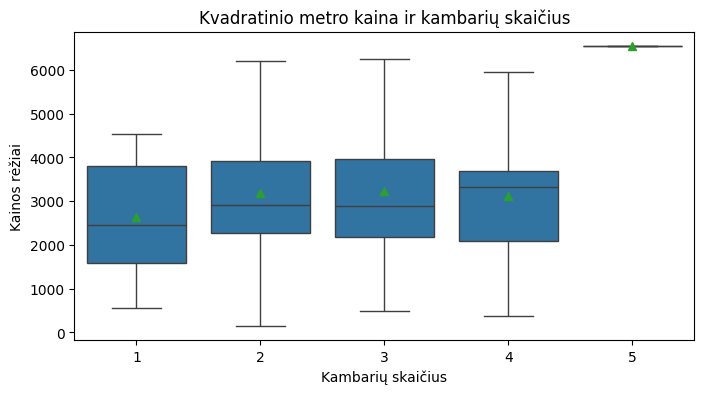

In [18]:
# pavaizduokite su boxplotais kainų už 1 kv pasiskirstymą nuo kambarių skaičiaus.
fig,grafikas = plt.subplots(figsize=[8,4])
grafikas = sns.boxplot(data=aruodas.sort_values(by='kambariu_skaicius'), x='kambariu_skaicius', y='kvadrato_kaina', showfliers=False, ax=grafikas, showmeans=True) # ?? irasius showmeans=True neranda showmeans- nerado nes buvo irasytra be boxplot, o boxenplot
grafikas.set_title('Kvadratinio metro kaina ir kambarių skaičius')
grafikas.set_xlabel("Kambarių skaičius")
grafikas.set_ylabel("Kainos rėžiai")
plt.show()

In [19]:
# Pavaizduokiet tokią informaciją: atrinktų butų kainų pasiskirstymą tarp miestų.
def miestas(adresas):
    return adresas.split(',')[0]
aruodas['miestas'] = aruodas['adresas'].apply(miestas)
aruodas.head()

,buto _kaina,kvadrato_kaina,adresas,plotas,kambariu_skaicius,kainos_rėžiai,miestas
0,268000,7657,"Palanga, A. Mickevičiaus g.",35.00,2,neįperkamas,Palanga
1,329900,7331,"Palanga, A. Mickevičiaus g.",45.00,3,neįperkamas,Palanga
2,171200,4248,"Vilnius, Žirmūnai, Tuskulėnų g.",40.30,2,brangus,Vilnius
3,199000,4095,"Palanga, Palanga, Vanagupės g.",48.59,2,brangus,Palanga
4,240529,3733,"Vilnius, Žirmūnai, Kareivių g.",64.44,3,brangus,Vilnius


C:\Users\Cougar\AppData\Local\Temp\ipykernel_5768\3081613875.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grafikas.set_xticklabels(grafikas.get_xticklabels(),rotation=90)


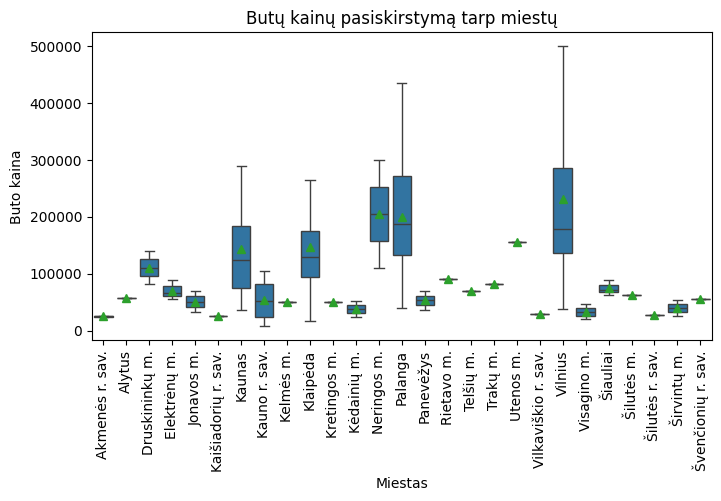

In [20]:
fig,grafikas = plt.subplots(figsize=[8,4])
grafikas = sns.boxplot(data=aruodas.sort_values(by='miestas'), x='miestas', y='buto _kaina', showfliers=False, showmeans=True, ax=grafikas) 
grafikas.set_title('Butų kainų pasiskirstymą tarp miestų')
grafikas.set_xlabel("Miestas")
grafikas.set_ylabel("Buto kaina")
grafikas.set_xticklabels(grafikas.get_xticklabels(),rotation=90)
plt.show()

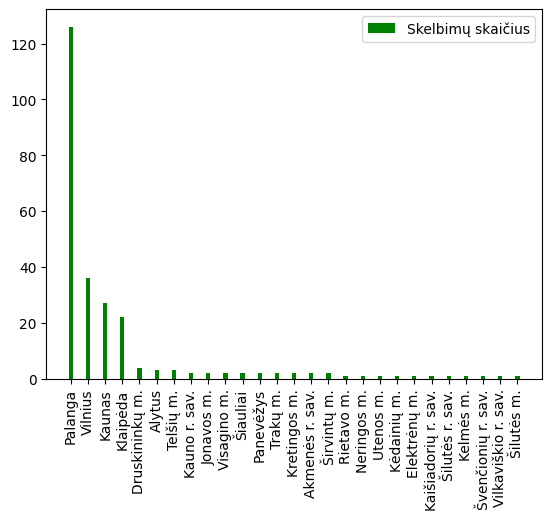

In [22]:
# pavaizduokite tokią informaciją - kiek buvo sklebimų per skirtingus miestus jūsų atrankoje?
aruodas2 = aruodas['miestas'].value_counts()
aruodas2.head()                                                   
fig, ax = plt.subplots()
ax.bar(aruodas['miestas'].unique(),aruodas['miestas'].value_counts(), color= 'Green', width= 0.25, label = "Skelbimų skaičius")
ax.tick_params(axis='x', rotation=90)
ax.legend(loc='best')
plt.show()